### Problem Statement

##### Q. Find publicly available data for key factors that influence US home prices nationally. Then, build a data science model that explains how these factors impacted home prices over the last 20 years. Use the S&P Case-Schiller Home Price Index as a proxy for home prices: fred.stlouisfed.org/series/CSUSHPISA.

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

In [2]:
df = pd.read_excel(r"C:\Users\kiran\Desktop\datatrained\Home LLC Interview\data collected\Combined Final Data.xlsx")
df

,Date,HPI,UNEMP_RATE,DSPI,GDP,HOUST1F,Inflation,M_SP,Supply_Rate,MORTGAGE,PCE,PSAVERT,POPTHM,Growth Rate,TTLCONS
0,2003-01-01,128.461,5.8,8268.0,98.336393,1537,2.6,181700,4.0,5.9160,7541.3,5.3,289412,0.000685,863855
1,2003-02-01,129.355,5.9,8274.7,98.329348,1301,3.0,187000,4.5,5.8425,7548.6,5.2,289606,0.000670,859225
2,2003-03-01,130.148,5.9,8313.4,98.368090,1399,3.0,185100,4.1,5.7450,7611.5,4.9,289809,0.000701,851132
3,2003-04-01,130.884,6.0,8342.9,98.453754,1374,2.2,189500,4.1,5.8125,7634.5,5.0,290024,0.000742,859459
4,2003-05-01,131.735,6.1,8394.8,98.584413,1391,2.1,195500,3.9,5.4840,7650.3,5.3,290250,0.000779,866814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2023-05-01,302.566,3.7,20185.4,99.943470,1012,4.0,421200,7.2,6.4250,18407.8,5.3,335013,0.000397,1946733
245,2023-06-01,304.593,3.6,20208.4,100.045476,930,3.0,417600,7.5,6.7140,18485.4,4.8,335163,0.000448,1956226
246,2023-07-01,306.767,3.5,20229.6,100.164368,988,3.2,435800,7.1,6.8400,18621.3,4.2,335329,0.000495,1969005
247,2023-08-01,309.155,3.8,20306.7,100.289174,948,3.7,439900,7.8,7.0720,18689.9,4.2,335501,0.000513,2010143


In [3]:
df.columns

Index(['Date', 'HPI', 'UNEMP_RATE', 'DSPI', 'GDP', 'HOUST1F', 'Inflation',
       'M_SP', 'Supply_Rate', 'MORTGAGE', 'PCE', 'PSAVERT', 'POPTHM',
       'Growth Rate', 'TTLCONS '],
      dtype='object')

#### Columns
- Date  - The date of observation
- UNEMP_RATE  - Unemployment Rate (in %)
- DSPI -Disposable Personal Income (in Billions)
- GDP  -Gross Domestic Product (GDP): Normalised for United States
- HOUST1F  - New Privately-Owned Housing Units Started (in Thousands)
- Inflation  - U.S Annual Inflation Rates.
- M_SP - Median Sales Price for New Houses Sold in the United States
- Supply_Rate - Monthly Supply of New Houses in the United States
- MORTGAGE - Mortgage Intrest Rate (in %)
- PCE - Personal Consumption Expenditures (in Billions)
- PSAVERT - Personal Saving Rate (in %)
- POPTHM - Population (in Thousands)
- Growth Rate - Population Growth Rate
- TTLCONS - Total Construction Spending (in Millions)

#### Target
1. HPI  - S&P/Case-Shiller U.S. National Home Price Index

#### Analising basic metrics

In [4]:
df.shape

(249, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         249 non-null    datetime64[ns]
 1   HPI          249 non-null    float64       
 2   UNEMP_RATE   249 non-null    float64       
 3   DSPI         249 non-null    float64       
 4   GDP          249 non-null    float64       
 5   HOUST1F      249 non-null    int64         
 6   Inflation    249 non-null    float64       
 7   M_SP         249 non-null    int64         
 8   Supply_Rate  249 non-null    float64       
 9   MORTGAGE     249 non-null    float64       
 10  PCE          249 non-null    float64       
 11  PSAVERT      249 non-null    float64       
 12  POPTHM       249 non-null    int64         
 13  Growth Rate  249 non-null    float64       
 14  TTLCONS      249 non-null    int64         
dtypes: datetime64[ns](1), float64(10), int64(4)
memory usage:

##### Findings
- There are 13 Numerical columns and 1 Date columns
- Date column must be converted into datetime data type

In [6]:
# Convert the 'date_column' to datetime data type
df['Date'] = pd.to_datetime(df['Date'])

# Extract Month and Year
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year


In [7]:
df.isnull().sum()

Date           0
HPI            0
UNEMP_RATE     0
DSPI           0
GDP            0
HOUST1F        0
Inflation      0
M_SP           0
Supply_Rate    0
MORTGAGE       0
PCE            0
PSAVERT        0
POPTHM         0
Growth Rate    0
TTLCONS        0
month          0
year           0
dtype: int64

- No Null Values can be observed

In [8]:
df.nunique()

Date           249
HPI            249
UNEMP_RATE      64
DSPI           248
GDP            249
HOUST1F        220
Inflation       72
M_SP           227
Supply_Rate     72
MORTGAGE       238
PCE            249
PSAVERT         78
POPTHM         249
Growth Rate    249
TTLCONS        249
month           12
year            21
dtype: int64

- All columns are continous

In [9]:
df.describe()

,HPI,UNEMP_RATE,DSPI,GDP,HOUST1F,Inflation,M_SP,Supply_Rate,MORTGAGE,PCE,PSAVERT,POPTHM,Growth Rate,TTLCONS,month,year
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,2.490000e+02,249.000000,249.000000
mean,185.081968,5.924498,13179.864659,99.870250,917.212851,2.553414,283452.610442,6.193173,4.753661,11915.857831,5.875502,315549.405622,0.000598,1.180004e+06,6.445783,2012.879518
std,46.531700,2.047836,3280.418809,1.215264,389.720928,1.910771,70742.594529,1.939465,1.151192,2830.657944,3.490159,13989.070742,0.000199,3.121554e+05,3.442803,6.002817
min,128.461000,3.400000,8268.000000,92.031035,353.000000,-2.100000,181700.000000,3.300000,2.684000,7541.300000,1.400000,289412.000000,-0.000166,7.583760e+05,1.000000,2003.000000
25%,148.278000,4.400000,10745.400000,99.622947,614.000000,1.500000,228300.000000,4.900000,3.840000,9847.200000,4.400000,303707.000000,0.000495,9.290610e+05,3.000000,2008.000000
50%,174.342000,5.400000,12441.900000,99.943470,843.000000,2.200000,262200.000000,5.600000,4.510000,11321.600000,5.500000,316729.000000,0.000641,1.135406e+06,6.000000,2013.000000
75%,202.913000,7.200000,15508.800000,100.421834,1136.000000,3.400000,321400.000000,7.300000,5.842500,13838.400000,6.400000,328863.000000,0.000740,1.326111e+06,9.000000,2018.000000
max,311.175000,14.700000,21858.100000,101.871442,1823.000000,9.100000,496800.000000,12.200000,7.200000,18823.400000,32.000000,335675.000000,0.000916,2.014718e+06,12.000000,2023.000000


#### Observations
- Distribution
    - Majority of the data seems Normally Distributed (Since Mean ~= Median), But a hint of skewness can be observed in few columns.
    
    - Normally distributed (Since Mean ~= Median)												
        - HPI
        - UNEMP_RATE
        - DSPI
        - GDP
        - HOUST1F
        - Inflation
        - M_SP
        - Supply_Rate
        - MORTGAGE
        - PCE
        - PSAVERT
        - POPTHM
        - Growth Rate
        - TTLCONS

    - Right skewed (mean > median)
        - UNEMP_RATE
        - PSAVERT
    - LEFT skewed (mean < median)
        - GDP
        - Growth Rate

- From Above obervation we cannot find the presence of outliers(i.e. No Differences Between Max & 75%,Min & 25%) can be observed

#### Data Visualization

##### Distribution Plot

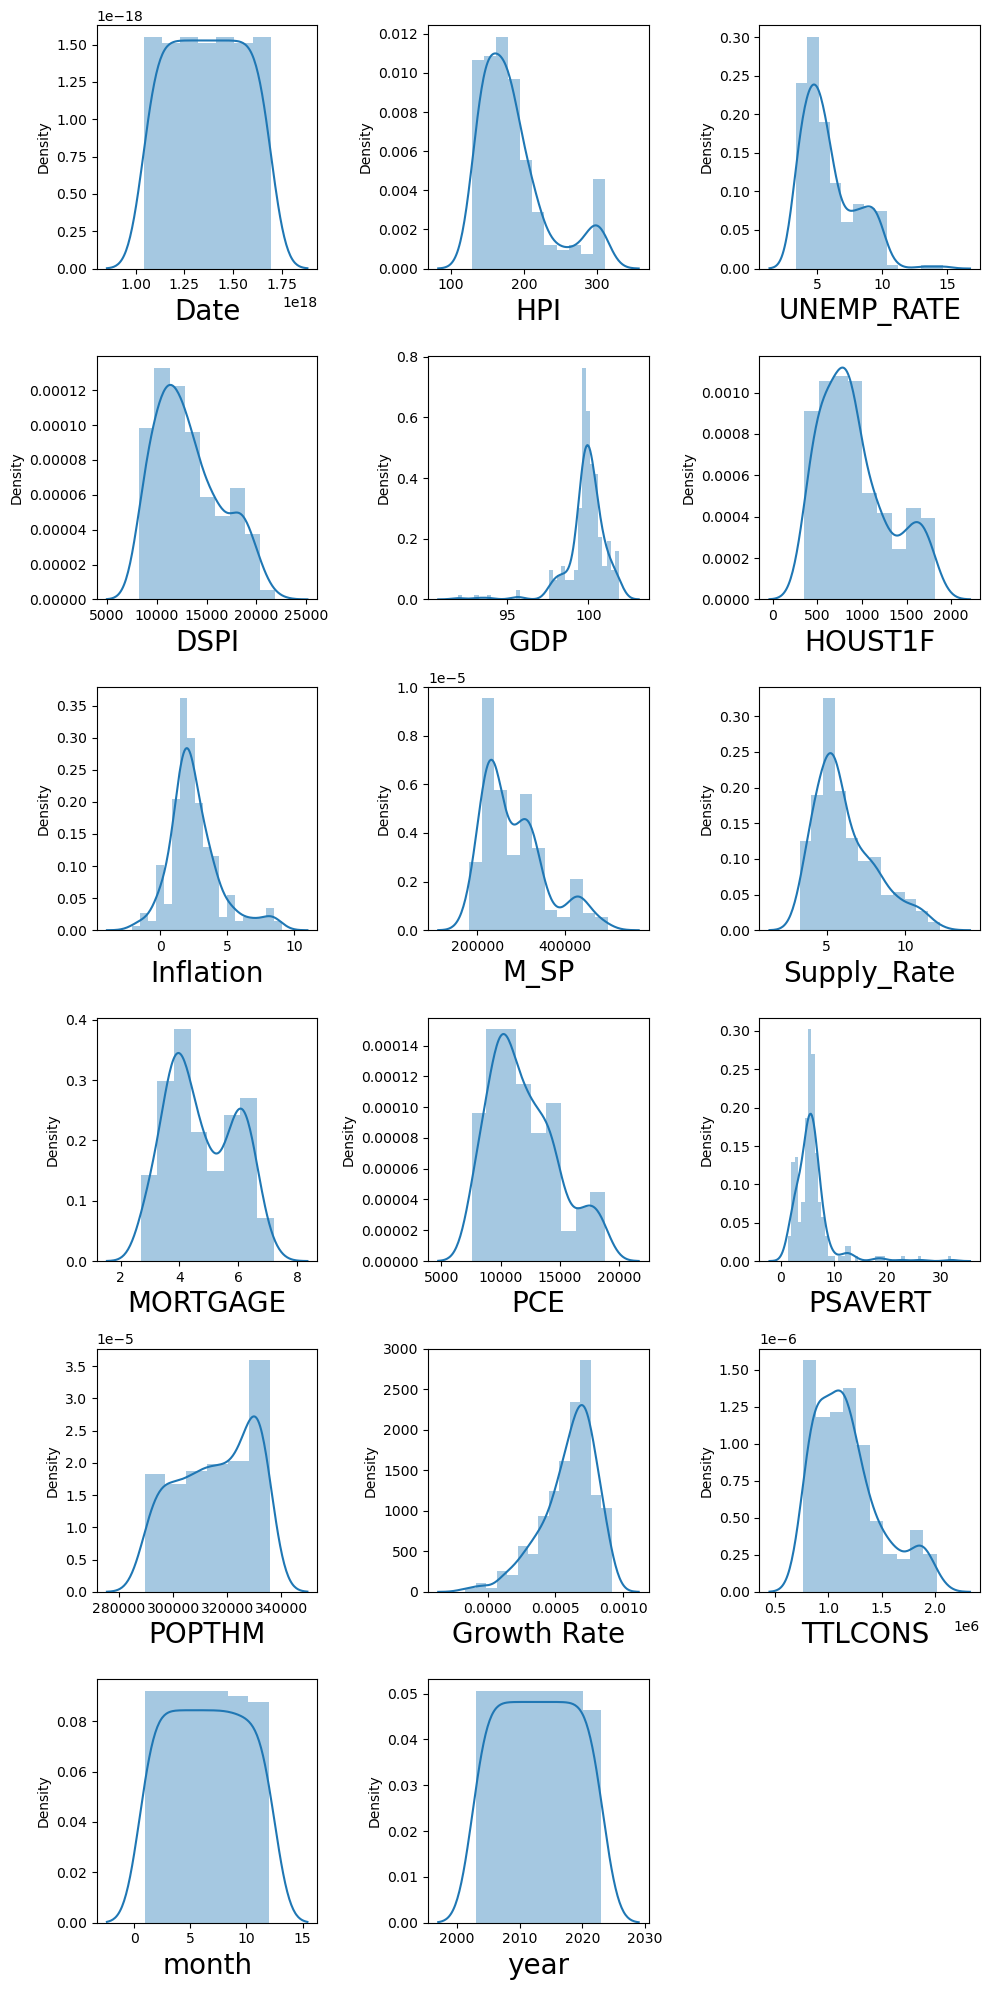

In [10]:
plt.figure(figsize=(10,20))
pn = 1
for column in df.columns:
    
    sns.distplot(df[column],ax=plt.subplot(6,3,pn))
    plt.xlabel(column,fontsize = 20)
    pn +=1
    
plt.tight_layout()      

- We can observe that Most of the columns are Not skewed (Normally Distrubuted)
- Skeweness is as discussed earlier
	

##### Line Plot

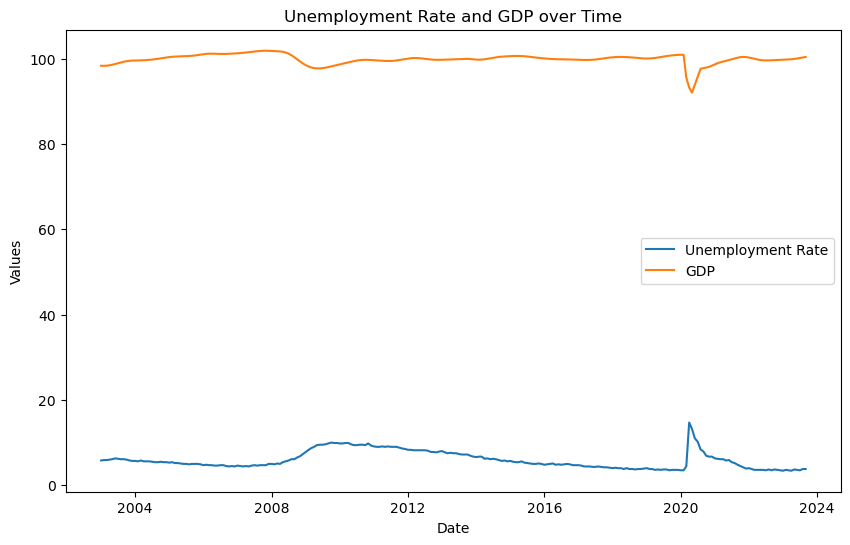

In [11]:
plt.figure(figsize=(10, 6))  
plt.plot(df['Date'], df['UNEMP_RATE'], label='Unemployment Rate')
plt.plot(df['Date'], df['GDP'], label='GDP')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Unemployment Rate and GDP over Time')
plt.legend()
plt.show()

- we can observe that GDP and Unemployment rate are inversly related i.e. increase in unemploymnt rate dicreases GDP

##### Scatter Plot

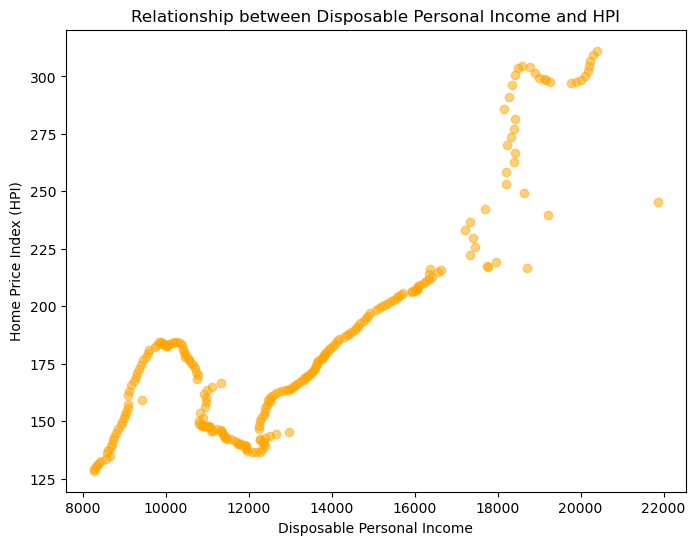

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(df['DSPI'], df['HPI'], alpha=0.5, color='orange')
plt.xlabel('Disposable Personal Income')
plt.ylabel('Home Price Index (HPI)')
plt.title('Relationship between Disposable Personal Income and HPI')
plt.show()

- we can observe that HPI AND Disposable Personal Income are **positively** corelated

##### Year wise Median sale price

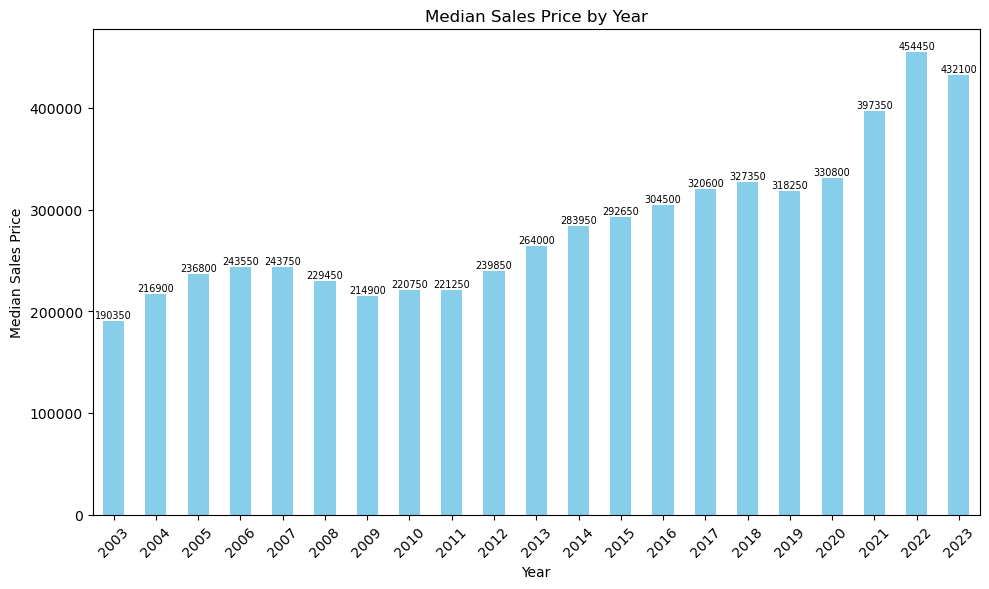

In [13]:
median_price_by_year = df.groupby('year')['M_SP'].median()
plt.figure(figsize=(10, 6))
bar_plot = median_price_by_year.plot(kind='bar', color='skyblue')

for idx, value in enumerate(median_price_by_year):
    plt.text(idx, value + 1000, f'{value:.0f}', ha='center', va='bottom', fontsize=7)

plt.xlabel('Year')
plt.ylabel('Median Sales Price')
plt.title('Median Sales Price by Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Corelation Analysis

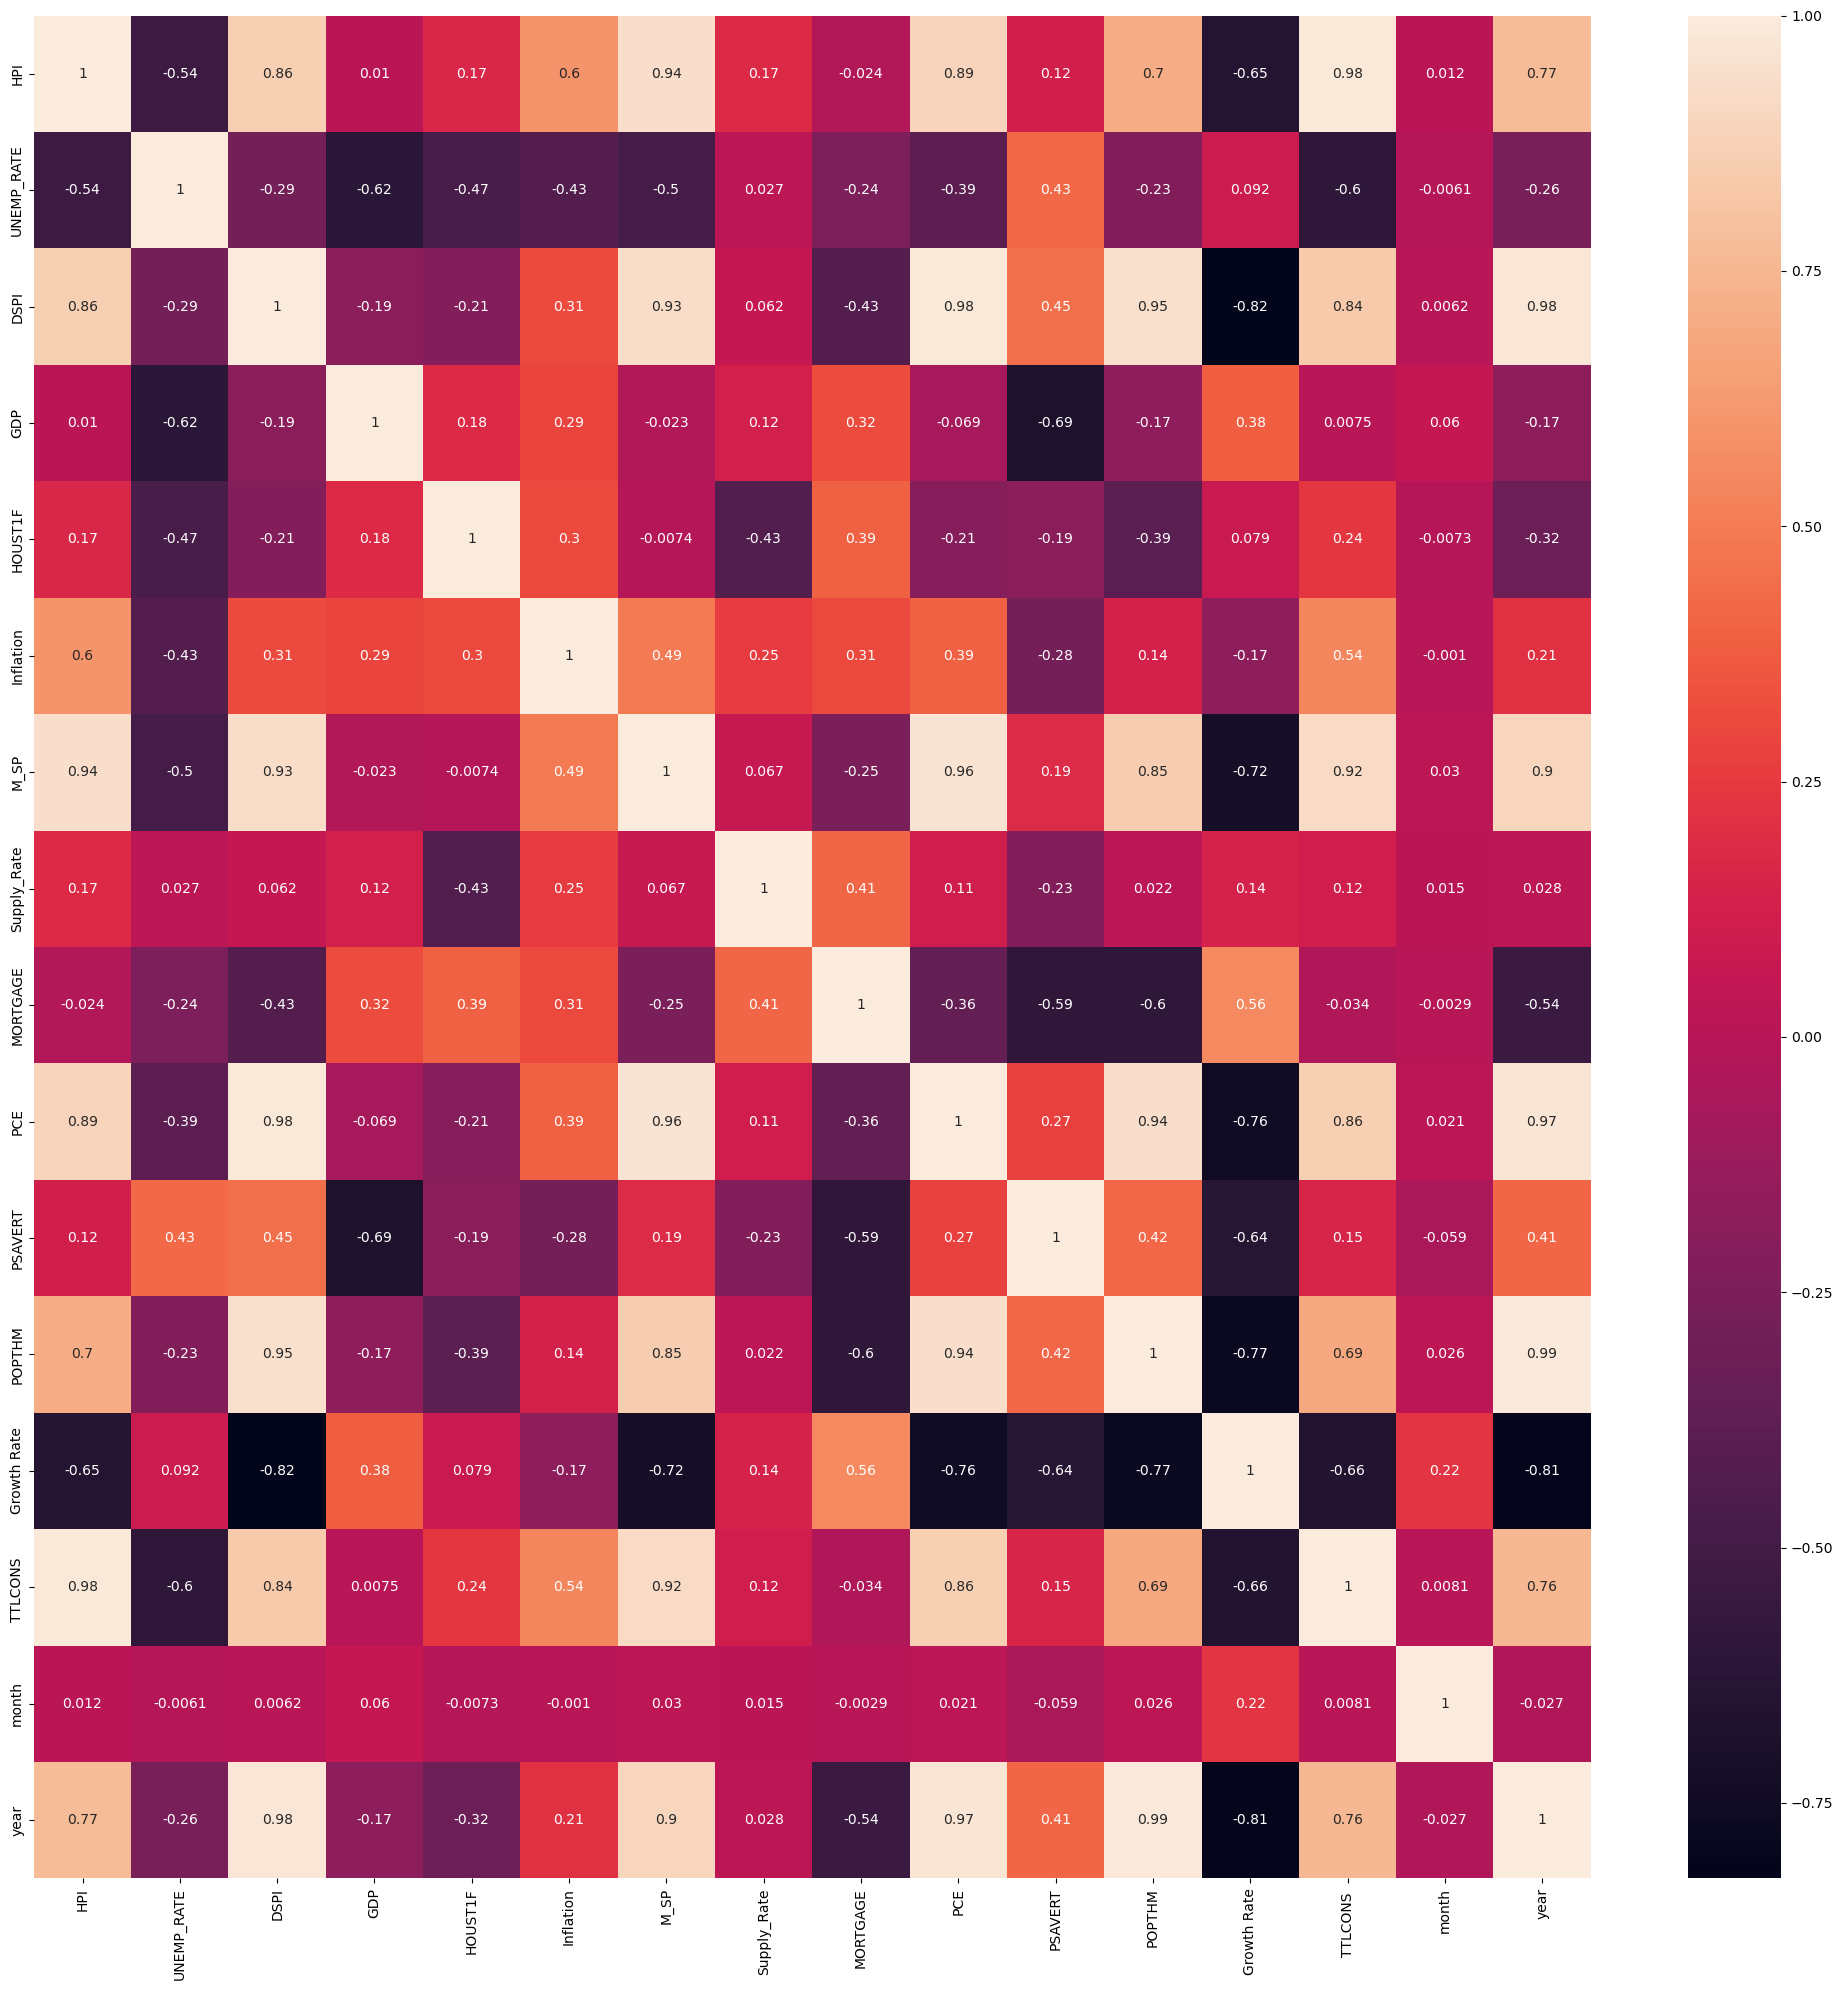

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,annot_kws={'size':10})
plt.tight_layout()

#### Important Observations
- HPI:
    - Strong positive correlations with: DSPI (0.858), M_SP (0.941), PCE (0.886), TTLCONS (0.983)
- UNEMP_RATE:
    - negative correlations with: GDP (-0.617), HOUST1F (-0.471), PSAVERT (-0.429)
- DSPI:
    - Strong positive correlations with: HPI (0.858), M_SP (0.930), PCE (0.982), TTLCONS (0.843)
- GDP:
    - Strong negative correlation with: UNEMP_RATE (-0.617)
- Inflation:
    - Moderate positive correlations with: HPI (0.597), M_SP (0.494), PCE (0.388), TTLCONS (0.538)
- M_SP:
    - Strong positive correlations with: HPI (0.941), DSPI (0.930), PCE (0.958), TTLCONS (0.921)
- Growth Rate:
    - Strong negative correlations with: DSPI (-0.824), TTLCONS (-0.656), year (-0.806)
- POPTHM:
    - Strong positive correlations with: DSPI (0.948), HPI (0.701), year (0.992)

### Outliers

In [15]:
df1 = df.drop(columns=['month','year','Date']).copy()

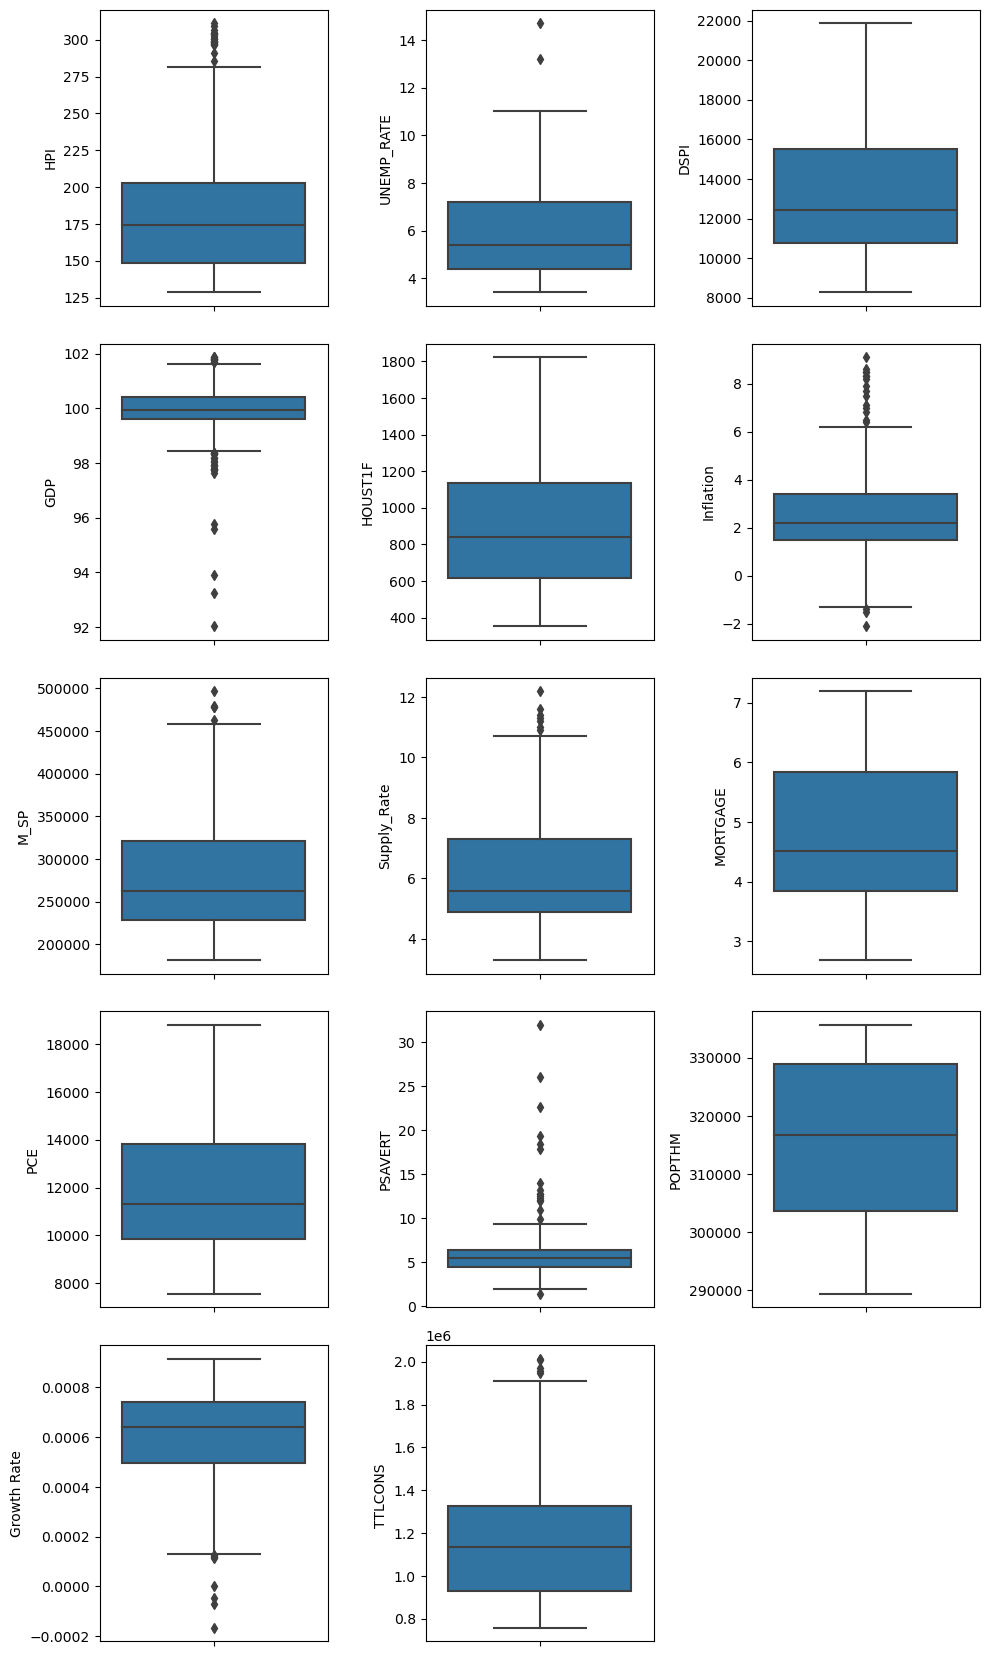

In [16]:
plt.figure(figsize=(10,20))
pn=1
for i in df1.columns:
    sns.boxplot(data=df1,y=i,ax=plt.subplot(6,3,pn))
    pn+=1
plt.tight_layout()    

- There are Many outliers which are needed to be Checked

In [17]:
# finding outliers using z score
from scipy.stats import zscore
z = np.abs(zscore(df1))
z[z>3].count()

HPI            0
UNEMP_RATE     2
DSPI           0
GDP            5
HOUST1F        0
Inflation      6
M_SP           1
Supply_Rate    1
MORTGAGE       0
PCE            0
PSAVERT        6
POPTHM         0
Growth Rate    3
TTLCONS        0
dtype: int64

<AxesSubplot: >

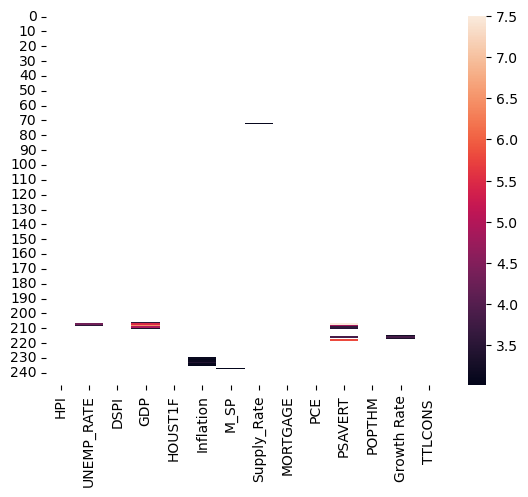

In [18]:
sns.heatmap(z[z>3])

- We can observe that Majority of the outliers are aound years 2021,2022.
- This can be due to **Covid 19 Pandamic**
- so i,Feel It is wise to keep these outliers for gaining valuable insights.

#### Treating Skewness

In [19]:
df1.skew().abs()

HPI            1.311186
UNEMP_RATE     1.051399
DSPI           0.556285
GDP            2.543659
HOUST1F        0.726292
Inflation      1.082925
M_SP           0.993782
Supply_Rate    0.932554
MORTGAGE       0.197052
PCE            0.645530
PSAVERT        3.648431
POPTHM         0.266724
Growth Rate    1.047579
TTLCONS        0.912868
dtype: float64

In [20]:
skewed_columns = [x for x in df1.columns if df1[x].skew() > 1 or df1[x].skew() < -1]
skewed_columns

['HPI', 'UNEMP_RATE', 'GDP', 'Inflation', 'PSAVERT', 'Growth Rate']

skeweness of 'HPI', 'UNEMP_RATE', 'GDP', 'Inflation', 'PSAVERT' & 'Growth Rate' Needs to be Treated

In [21]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson',standardize=False)
df1[skewed_columns] = pt.fit_transform(df1[skewed_columns])
df1

,HPI,UNEMP_RATE,DSPI,GDP,HOUST1F,Inflation,M_SP,Supply_Rate,MORTGAGE,PCE,PSAVERT,POPTHM,Growth Rate,TTLCONS
0,0.539097,0.875639,8268.0,3.787013e+61,1537,2.016832,181700,4.0,5.9160,7541.3,1.350861,289412,0.001456,863855
1,0.539098,0.877936,8274.7,3.778539e+61,1301,2.271700,187000,4.5,5.8425,7548.6,1.342519,289606,0.001401,859225
2,0.539099,0.877936,8313.4,3.825366e+61,1399,2.271700,185100,4.1,5.7450,7611.5,1.316358,289809,0.001521,851132
3,0.539099,0.880169,8342.9,3.930911e+61,1374,1.752193,189500,4.1,5.8125,7634.5,1.325275,290024,0.001692,859459
4,0.539100,0.882340,8394.8,4.097343e+61,1391,1.684320,195500,3.9,5.4840,7650.3,1.350861,290250,0.001861,866814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,0.539149,0.805378,20185.4,6.286895e+61,1012,2.873938,421200,7.2,6.4250,18407.8,1.350861,335013,0.000604,1946733
245,0.539149,0.800467,20208.4,6.490686e+61,930,2.271700,417600,7.5,6.7140,18485.4,1.307234,335163,0.000721,1956226
246,0.539149,0.795343,20229.6,6.736289e+61,988,2.395884,435800,7.1,6.8400,18621.3,1.247622,335329,0.000842,1969005
247,0.539149,0.810088,20306.7,7.003786e+61,948,2.697932,439900,7.8,7.0720,18689.9,1.247622,335501,0.000890,2010143


### Removing Unwanted Columns

 - The Following columns have High Multicolinearity and Presence of direct High corelation with HPI
    - M_SP
    - TTLCONS
 - For Better Model Training And to understand Feature Importance Better, We can remove these columns

In [22]:

x = df1.drop(columns=['HPI',"M_SP","PCE","TTLCONS "])
y=df1['HPI']

##### Standerd Scaling

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_sc = scaler.fit_transform(x)


### Model Building

Linar Regression

In [24]:

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(x_sc, y, test_size=0.2, random_state=42)

# Initializing and fitting the linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predicting on the test set
y_pred = linear_reg.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression Mean Squared Error: {mse}")
print(f"Linear Regression R-squared: {r2}")


Linear Regression Mean Squared Error: 7.421402640693978e-12
Linear Regression R-squared: 0.9529587278313972


##### Random Forest Regression

In [25]:

# Initializing and fitting the random forest regression model
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)

# Predicting on the test set
y_pred_rf = rf_reg.predict(X_test)

# Evaluating the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regression Mean Squared Error: {mse_rf}")
print(f"Random Forest Regression R-squared: {r2_rf}")


Random Forest Regression Mean Squared Error: 6.872577556948824e-13
Random Forest Regression R-squared: 0.9956437508243586


- We can observe that our Models Linear regression and Random Forest classifier Have Given Good R2 Scores i.e. 95% and 99% respectively

##### Getting Features or coefficient deatils from models

In [26]:
# Coefficients for Linear Regression
linear_coefficients = linear_reg.coef_
sc_l_coef = scaler.fit_transform(linear_coefficients.reshape(10,1))

# Feature importance for Random Forest
rf_feature_importances = rf_reg.feature_importances_
sc_rf_coef = scaler.fit_transform(rf_feature_importances.reshape(10,1))


##### Plotting Heatmaps of feature Importance

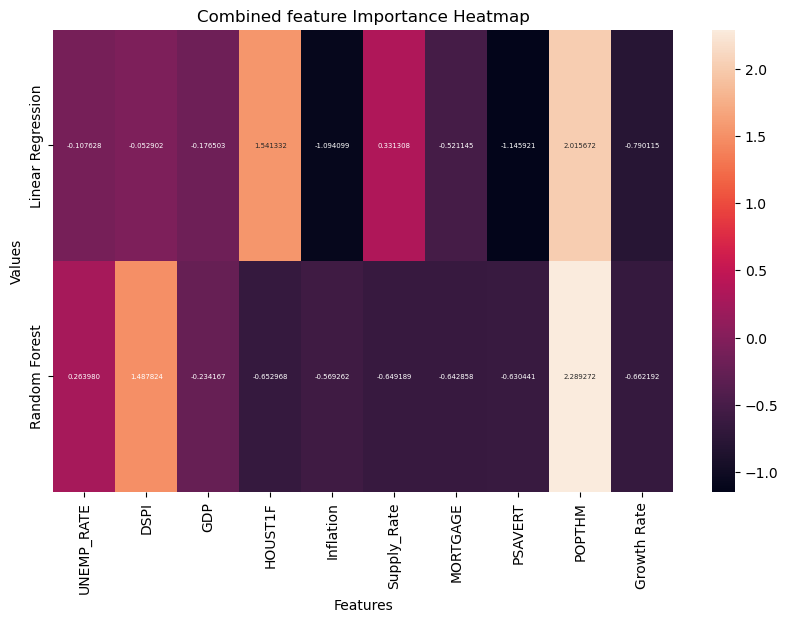

In [27]:
plt.figure(figsize=(10, 6))
sns.heatmap(np.reshape(list(sc_l_coef) + list(sc_rf_coef),(2,10)), annot=True,fmt='.6f',annot_kws={'size':5},  yticklabels=['Linear Regression',"Random Forest"], xticklabels=x.columns)
plt.title('Combined feature Importance Heatmap')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

### observations
- FROM both Models we can observe  that the important factors affecting Housing price index are
    - Population
    - Disposable Personal Income
    - inflation
    - Personal Saving Rate
    - Housing Units Started
    

#### Test Prediction
 
lets predict each model on trail data by changing 1 varible by 1 unit in each step

In [28]:
z = np.array([[0,0,0,0,0,0,0,0,0,0],
             [1,0,0,0,0,0,0,0,0,0],
             [0,1,0,0,0,0,0,0,0,0],
             [0,0,1,0,0,0,0,0,0,0],
             [0,0,0,1,0,0,0,0,0,0],
             [0,0,0,0,1,0,0,0,0,0],
             [0,0,0,0,0,1,0,0,0,0],
             [0,0,0,0,0,0,1,0,0,0],
             [0,0,0,0,0,0,0,1,0,0],
             [0,0,0,0,0,0,0,0,1,0],
             [0,0,0,0,0,0,0,0,0,1]])
z.shape

(11, 10)

In [29]:
z_pred_rf = rf_reg.predict(z)
z_pred_rf

array([0.53911969, 0.53911224, 0.53912575, 0.53912182, 0.53911958,
       0.53911949, 0.53911968, 0.53911964, 0.53911843, 0.53912804,
       0.53911943])

In [30]:
z_pred_lr = linear_reg.predict(z)
z_pred_lr

array([0.53912467, 0.53912759, 0.53912787, 0.53912725, 0.53913593,
       0.53912261, 0.53912981, 0.5391255 , 0.53912235, 0.53913833,
       0.53912414])

In [31]:
Feature_Importance =np.reshape(list(np.abs(z_pred_lr[1:] - z_pred_lr[0])) + list(np.abs(z_pred_rf[1:] - z_pred_rf[0])),(2,10))

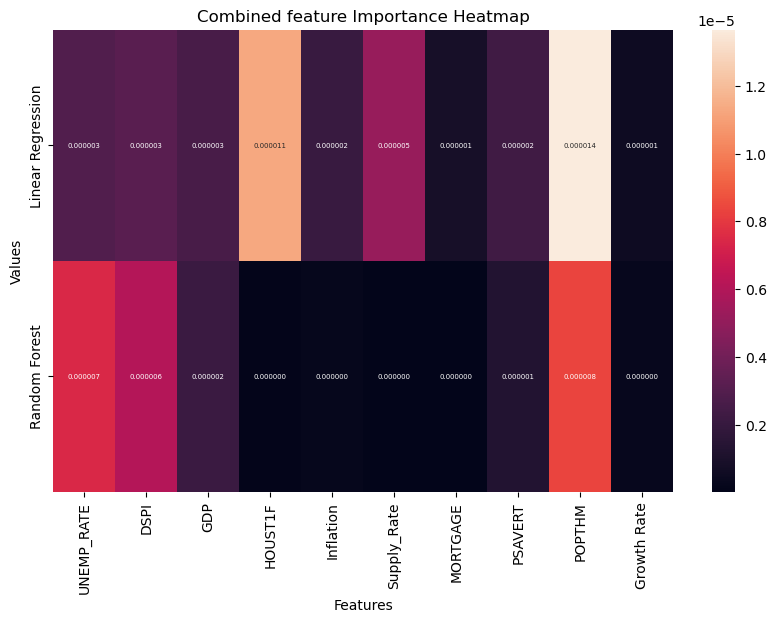

In [32]:
plt.figure(figsize=(10, 6))
sns.heatmap(Feature_Importance, annot=True,fmt='.6f',annot_kws={'size':5},  yticklabels=['Linear Regression',"Random Forest"], xticklabels=x.columns)
plt.title('Combined feature Importance Heatmap')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

### Conclusion

- Primary Factor affecting Housing Price index is **Population**
- Other Factors that impact HPI are *Unemployment Rate and Housing Units Started*